## EXPLORATORY DATA ANALYSIS

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from datasets import load_dataset
import ast 
import seaborn as sns  

In [3]:
dataset =load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df.iloc[0:1]

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\chairman\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Sun Aug 25 01:49:57 2024).


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None


In [4]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

FILTER DATA FOR US DATA ANALYST ROLES

In [5]:
df_US_DA = df[(df['job_country']== 'United States') & (df['job_title_short']=='Data Analyst')].copy()

In [6]:
df_plot = df_US_DA['job_location'].value_counts().head(10).to_frame()

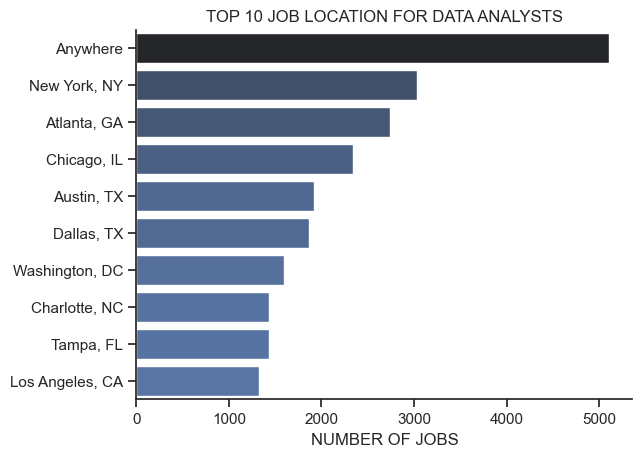

In [7]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location',hue='count', palette='dark:b_r')
sns.despine()
plt.ylabel('')
plt.title('TOP 10 JOB LOCATION FOR DATA ANALYSTS')
plt.xlabel('NUMBER OF JOBS')
plt.legend().remove()
plt.show()

## PIE CHART IN A SUBPLOT

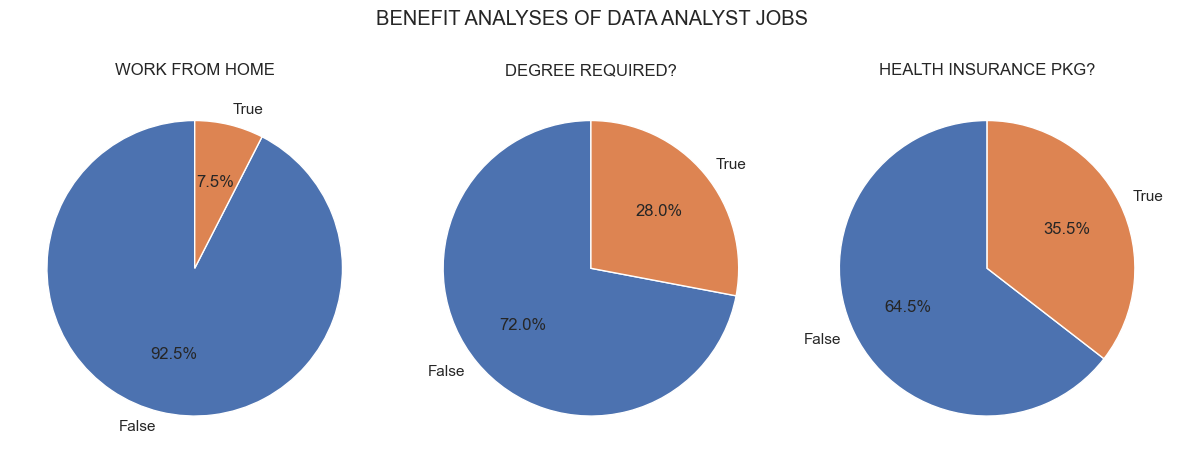

In [8]:
fig,ax= plt.subplots(1,3)
fig.set_size_inches(12,5)

dict= {
    'job_work_from_home':'WORK FROM HOME',
    'job_no_degree_mention':'DEGREE REQUIRED?',
    'job_health_insurance':'HEALTH INSURANCE PKG?'
}

for i, (column,title) in enumerate(dict.items()):
    df_US_DA[column].value_counts().plot(kind='pie', ax=ax[i], startangle=90, autopct='%1.1f%%', title=title)
    ax[i].set_ylabel('')

plt.suptitle('BENEFIT ANALYSES OF DATA ANALYST JOBS')
fig.tight_layout()
plt.show()


In [40]:
df_plot1 = df_US_DA['company_name'].value_counts().head(10).to_frame()

In [41]:
df_plot1.head(1)

,count
company_name,
Robert Half,959


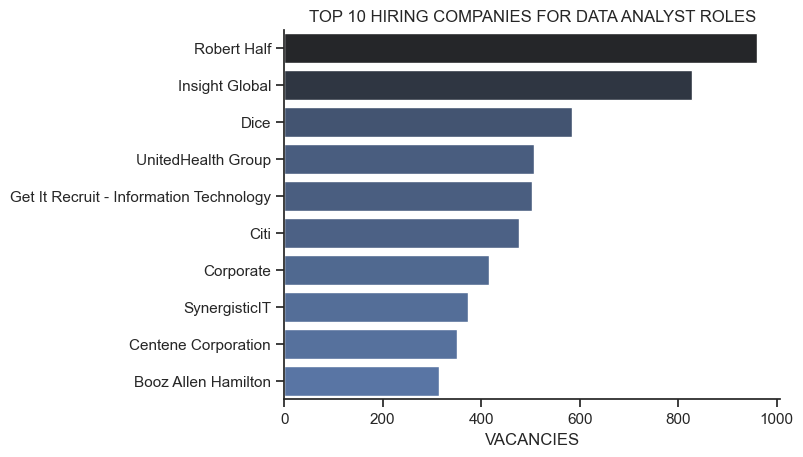

In [44]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot1, x='count', y='company_name', hue='count', palette='dark:b_r')
sns.despine()
plt.title('TOP 10 HIRING COMPANIES FOR DATA ANALYST ROLES')
plt.ylabel('')
plt.xlabel('VACANCIES')
plt.legend().remove()


AttributeError: 'numpy.ndarray' object has no attribute 'index'